## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0   9.531347  1500.512135  0.443527   4.748751  1.486636
1   7.088384   835.035892  0.770462  10.616511  1.596224
2   8.578238  1649.424671  0.773706   9.356083  1.449110
3   3.862252   335.492291  0.949693   9.711761  1.355634
4  47.085365   600.624901  0.371853   7.036000  1.304108


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.26475 | train_mse: 6.55968 | train_mae: 1.90362 |  0:00:00s
epoch 1  | loss: 0.91551 | train_mse: 3.42097 | train_mae: 1.44014 |  0:00:00s
epoch 2  | loss: 0.6305  | train_mse: 2.04676 | train_mae: 1.10343 |  0:00:00s


epoch 3  | loss: 0.62517 | train_mse: 1.75715 | train_mae: 1.03219 |  0:00:00s
epoch 4  | loss: 0.62279 | train_mse: 1.44276 | train_mae: 0.89991 |  0:00:00s


epoch 5  | loss: 0.37932 | train_mse: 1.07764 | train_mae: 0.78365 |  0:00:00s
epoch 6  | loss: 0.6699  | train_mse: 0.68738 | train_mae: 0.6429  |  0:00:00s
epoch 7  | loss: 0.4964  | train_mse: 0.65949 | train_mae: 0.63044 |  0:00:00s


epoch 8  | loss: 0.38969 | train_mse: 0.71052 | train_mae: 0.64894 |  0:00:01s
epoch 9  | loss: 0.56469 | train_mse: 0.94139 | train_mae: 0.70461 |  0:00:01s


epoch 10 | loss: 0.48866 | train_mse: 0.9679  | train_mae: 0.65795 |  0:00:01s
epoch 11 | loss: 0.50021 | train_mse: 0.66188 | train_mae: 0.54163 |  0:00:01s


epoch 12 | loss: 0.39072 | train_mse: 0.73185 | train_mae: 0.58658 |  0:00:01s
epoch 13 | loss: 0.38845 | train_mse: 0.93876 | train_mae: 0.67064 |  0:00:01s


epoch 14 | loss: 0.33873 | train_mse: 0.77438 | train_mae: 0.57182 |  0:00:01s
epoch 15 | loss: 0.30285 | train_mse: 0.80106 | train_mae: 0.55287 |  0:00:02s


epoch 16 | loss: 0.35846 | train_mse: 0.77775 | train_mae: 0.5483  |  0:00:02s
epoch 17 | loss: 0.4038  | train_mse: 0.87838 | train_mae: 0.62911 |  0:00:02s


epoch 18 | loss: 0.2686  | train_mse: 0.49423 | train_mae: 0.52284 |  0:00:02s
epoch 19 | loss: 0.35803 | train_mse: 0.30869 | train_mae: 0.4232  |  0:00:02s


epoch 20 | loss: 0.33663 | train_mse: 0.31716 | train_mae: 0.40341 |  0:00:02s


epoch 21 | loss: 0.18178 | train_mse: 0.51735 | train_mae: 0.50643 |  0:00:03s
epoch 22 | loss: 0.34572 | train_mse: 0.55717 | train_mae: 0.51266 |  0:00:03s


epoch 23 | loss: 0.25387 | train_mse: 0.44333 | train_mae: 0.46228 |  0:00:03s
epoch 24 | loss: 0.23588 | train_mse: 0.29364 | train_mae: 0.39228 |  0:00:03s
epoch 25 | loss: 0.14921 | train_mse: 0.25656 | train_mae: 0.35899 |  0:00:03s


epoch 26 | loss: 0.23716 | train_mse: 0.27232 | train_mae: 0.37082 |  0:00:03s
epoch 27 | loss: 0.26158 | train_mse: 0.22095 | train_mae: 0.34781 |  0:00:03s
epoch 28 | loss: 0.15506 | train_mse: 0.16513 | train_mae: 0.32118 |  0:00:03s


epoch 29 | loss: 0.24023 | train_mse: 0.15042 | train_mae: 0.31023 |  0:00:03s
epoch 30 | loss: 0.40523 | train_mse: 0.13174 | train_mae: 0.28546 |  0:00:03s
epoch 31 | loss: 0.20751 | train_mse: 0.12671 | train_mae: 0.27988 |  0:00:03s


epoch 32 | loss: 0.22939 | train_mse: 0.13775 | train_mae: 0.2901  |  0:00:04s
epoch 33 | loss: 0.23892 | train_mse: 0.17925 | train_mae: 0.3095  |  0:00:04s
epoch 34 | loss: 0.22022 | train_mse: 0.16011 | train_mae: 0.31569 |  0:00:04s


epoch 35 | loss: 0.27669 | train_mse: 0.13502 | train_mae: 0.29403 |  0:00:04s
epoch 36 | loss: 0.34102 | train_mse: 0.13305 | train_mae: 0.29251 |  0:00:04s
epoch 37 | loss: 0.30154 | train_mse: 0.13116 | train_mae: 0.28346 |  0:00:04s


epoch 38 | loss: 0.28879 | train_mse: 0.14926 | train_mae: 0.28924 |  0:00:04s
epoch 39 | loss: 0.16724 | train_mse: 0.15631 | train_mae: 0.30155 |  0:00:04s
epoch 40 | loss: 0.2183  | train_mse: 0.15293 | train_mae: 0.30807 |  0:00:04s


epoch 41 | loss: 0.18387 | train_mse: 0.11518 | train_mae: 0.27952 |  0:00:04s
epoch 42 | loss: 0.12906 | train_mse: 0.13079 | train_mae: 0.28856 |  0:00:04s
epoch 43 | loss: 0.24844 | train_mse: 0.14957 | train_mae: 0.30121 |  0:00:04s
epoch 44 | loss: 0.23164 | train_mse: 0.10114 | train_mae: 0.27364 |  0:00:04s


epoch 45 | loss: 0.22794 | train_mse: 0.14817 | train_mae: 0.30434 |  0:00:05s
epoch 46 | loss: 0.25946 | train_mse: 0.16022 | train_mae: 0.30922 |  0:00:05s
epoch 47 | loss: 0.6208  | train_mse: 0.19693 | train_mae: 0.315   |  0:00:05s
epoch 48 | loss: 0.15553 | train_mse: 0.26405 | train_mae: 0.34329 |  0:00:05s


epoch 49 | loss: 0.20949 | train_mse: 0.24929 | train_mae: 0.3422  |  0:00:05s
epoch 50 | loss: 0.24352 | train_mse: 0.20597 | train_mae: 0.31696 |  0:00:05s
epoch 51 | loss: 0.15701 | train_mse: 0.15785 | train_mae: 0.28477 |  0:00:05s
epoch 52 | loss: 0.15497 | train_mse: 0.19212 | train_mae: 0.29512 |  0:00:05s


epoch 53 | loss: 0.17946 | train_mse: 0.21343 | train_mae: 0.32876 |  0:00:05s
epoch 54 | loss: 0.25854 | train_mse: 0.17189 | train_mae: 0.3048  |  0:00:05s
epoch 55 | loss: 0.23116 | train_mse: 0.17083 | train_mae: 0.31006 |  0:00:05s
epoch 56 | loss: 0.26347 | train_mse: 0.21472 | train_mae: 0.333   |  0:00:05s


epoch 57 | loss: 0.13259 | train_mse: 0.20539 | train_mae: 0.31435 |  0:00:05s
epoch 58 | loss: 0.33557 | train_mse: 0.09776 | train_mae: 0.24621 |  0:00:05s
epoch 59 | loss: 0.12217 | train_mse: 0.12907 | train_mae: 0.27711 |  0:00:06s


epoch 60 | loss: 0.14805 | train_mse: 0.25413 | train_mae: 0.32383 |  0:00:06s
epoch 61 | loss: 0.18161 | train_mse: 0.18135 | train_mae: 0.29819 |  0:00:06s
epoch 62 | loss: 0.1972  | train_mse: 0.16654 | train_mae: 0.28219 |  0:00:06s
epoch 63 | loss: 0.14185 | train_mse: 0.17955 | train_mae: 0.29433 |  0:00:06s


epoch 64 | loss: 0.46914 | train_mse: 0.14155 | train_mae: 0.27054 |  0:00:06s
epoch 65 | loss: 0.10408 | train_mse: 0.1463  | train_mae: 0.27608 |  0:00:06s
epoch 66 | loss: 0.25056 | train_mse: 0.10847 | train_mae: 0.25299 |  0:00:06s
epoch 67 | loss: 0.27237 | train_mse: 0.10539 | train_mae: 0.25634 |  0:00:06s


epoch 68 | loss: 0.13337 | train_mse: 0.09704 | train_mae: 0.24847 |  0:00:06s
epoch 69 | loss: 0.18177 | train_mse: 0.11303 | train_mae: 0.26246 |  0:00:06s
epoch 70 | loss: 0.25629 | train_mse: 0.10447 | train_mae: 0.25732 |  0:00:06s
epoch 71 | loss: 0.23169 | train_mse: 0.09665 | train_mae: 0.24375 |  0:00:06s


epoch 72 | loss: 0.1366  | train_mse: 0.10394 | train_mae: 0.24712 |  0:00:06s
epoch 73 | loss: 0.24148 | train_mse: 0.1231  | train_mae: 0.26139 |  0:00:06s
epoch 74 | loss: 0.22674 | train_mse: 0.19002 | train_mae: 0.3075  |  0:00:07s


epoch 75 | loss: 0.1917  | train_mse: 0.17338 | train_mae: 0.29969 |  0:00:07s
epoch 76 | loss: 0.21822 | train_mse: 0.09475 | train_mae: 0.25561 |  0:00:07s
epoch 77 | loss: 0.35033 | train_mse: 0.11283 | train_mae: 0.27524 |  0:00:07s


epoch 78 | loss: 0.32802 | train_mse: 0.14003 | train_mae: 0.29444 |  0:00:07s
epoch 79 | loss: 0.26153 | train_mse: 0.15304 | train_mae: 0.29564 |  0:00:07s
epoch 80 | loss: 0.18045 | train_mse: 0.29488 | train_mae: 0.37296 |  0:00:07s
epoch 81 | loss: 0.19698 | train_mse: 0.42054 | train_mae: 0.42759 |  0:00:07s


epoch 82 | loss: 0.19751 | train_mse: 0.30248 | train_mae: 0.37598 |  0:00:07s
epoch 83 | loss: 0.13744 | train_mse: 0.17365 | train_mae: 0.31146 |  0:00:07s
epoch 84 | loss: 0.13859 | train_mse: 0.10978 | train_mae: 0.26167 |  0:00:07s
epoch 85 | loss: 0.26853 | train_mse: 0.11057 | train_mae: 0.26229 |  0:00:07s


epoch 86 | loss: 0.12482 | train_mse: 0.15296 | train_mae: 0.29896 |  0:00:07s
epoch 87 | loss: 0.2041  | train_mse: 0.19641 | train_mae: 0.32104 |  0:00:07s


epoch 88 | loss: 0.13813 | train_mse: 0.15676 | train_mae: 0.29555 |  0:00:08s
epoch 89 | loss: 0.11623 | train_mse: 0.10078 | train_mae: 0.24422 |  0:00:08s
epoch 90 | loss: 0.29589 | train_mse: 0.09712 | train_mae: 0.24106 |  0:00:08s
epoch 91 | loss: 0.17489 | train_mse: 0.10336 | train_mae: 0.25569 |  0:00:08s


epoch 92 | loss: 0.26021 | train_mse: 0.1144  | train_mae: 0.26598 |  0:00:08s
epoch 93 | loss: 0.21139 | train_mse: 0.12338 | train_mae: 0.27688 |  0:00:08s
epoch 94 | loss: 0.13035 | train_mse: 0.10941 | train_mae: 0.26436 |  0:00:08s
epoch 95 | loss: 0.17461 | train_mse: 0.09363 | train_mae: 0.25006 |  0:00:08s


epoch 96 | loss: 0.22422 | train_mse: 0.1017  | train_mae: 0.25178 |  0:00:08s
epoch 97 | loss: 0.10681 | train_mse: 0.10077 | train_mae: 0.24688 |  0:00:08s
epoch 98 | loss: 0.09832 | train_mse: 0.0894  | train_mae: 0.23133 |  0:00:08s
epoch 99 | loss: 0.14848 | train_mse: 0.08156 | train_mae: 0.22291 |  0:00:08s


epoch 100| loss: 0.17057 | train_mse: 0.12899 | train_mae: 0.25798 |  0:00:08s
epoch 101| loss: 0.2125  | train_mse: 0.14056 | train_mae: 0.26128 |  0:00:08s
epoch 102| loss: 0.11139 | train_mse: 0.13214 | train_mae: 0.26598 |  0:00:09s


epoch 103| loss: 0.19725 | train_mse: 0.13689 | train_mae: 0.27947 |  0:00:09s
epoch 104| loss: 0.27189 | train_mse: 0.09799 | train_mae: 0.24377 |  0:00:09s
epoch 105| loss: 0.38333 | train_mse: 0.11673 | train_mae: 0.25279 |  0:00:09s
epoch 106| loss: 0.15734 | train_mse: 0.1108  | train_mae: 0.24786 |  0:00:09s


epoch 107| loss: 0.2649  | train_mse: 0.11323 | train_mae: 0.25039 |  0:00:09s
epoch 108| loss: 0.34757 | train_mse: 0.09997 | train_mae: 0.24566 |  0:00:09s
epoch 109| loss: 0.16097 | train_mse: 0.09326 | train_mae: 0.23881 |  0:00:09s


epoch 110| loss: 0.38829 | train_mse: 0.1254  | train_mae: 0.26479 |  0:00:09s
epoch 111| loss: 0.21964 | train_mse: 0.12531 | train_mae: 0.26856 |  0:00:09s
epoch 112| loss: 0.25071 | train_mse: 0.10542 | train_mae: 0.25165 |  0:00:09s
epoch 113| loss: 0.17788 | train_mse: 0.09878 | train_mae: 0.24468 |  0:00:09s


epoch 114| loss: 0.11402 | train_mse: 0.09321 | train_mae: 0.23481 |  0:00:09s
epoch 115| loss: 0.22086 | train_mse: 0.10788 | train_mae: 0.24848 |  0:00:10s
epoch 116| loss: 0.09463 | train_mse: 0.11253 | train_mae: 0.24516 |  0:00:10s


epoch 117| loss: 0.26805 | train_mse: 0.09933 | train_mae: 0.23201 |  0:00:10s
epoch 118| loss: 0.21291 | train_mse: 0.09738 | train_mae: 0.23111 |  0:00:10s
epoch 119| loss: 0.33253 | train_mse: 0.09176 | train_mae: 0.22608 |  0:00:10s


epoch 120| loss: 0.13291 | train_mse: 0.09107 | train_mae: 0.22692 |  0:00:10s
epoch 121| loss: 0.11769 | train_mse: 0.10121 | train_mae: 0.23687 |  0:00:10s
epoch 122| loss: 0.16197 | train_mse: 0.11102 | train_mae: 0.25024 |  0:00:10s


epoch 123| loss: 0.12066 | train_mse: 0.09418 | train_mae: 0.2283  |  0:00:10s
epoch 124| loss: 0.24347 | train_mse: 0.09346 | train_mae: 0.23602 |  0:00:10s
epoch 125| loss: 0.26972 | train_mse: 0.11213 | train_mae: 0.26106 |  0:00:11s


epoch 126| loss: 0.19962 | train_mse: 0.0953  | train_mae: 0.24043 |  0:00:11s
epoch 127| loss: 0.16055 | train_mse: 0.10016 | train_mae: 0.23632 |  0:00:11s
epoch 128| loss: 0.16916 | train_mse: 0.10539 | train_mae: 0.23781 |  0:00:11s


epoch 129| loss: 0.15095 | train_mse: 0.08411 | train_mae: 0.21263 |  0:00:11s
epoch 130| loss: 0.13903 | train_mse: 0.0863  | train_mae: 0.22637 |  0:00:11s


epoch 131| loss: 0.34122 | train_mse: 0.1501  | train_mae: 0.26473 |  0:00:11s
epoch 132| loss: 0.25703 | train_mse: 0.16963 | train_mae: 0.27402 |  0:00:11s


epoch 133| loss: 0.21756 | train_mse: 0.1445  | train_mae: 0.27053 |  0:00:11s
epoch 134| loss: 0.16125 | train_mse: 0.12695 | train_mae: 0.26794 |  0:00:11s
epoch 135| loss: 0.12897 | train_mse: 0.10053 | train_mae: 0.2415  |  0:00:12s


epoch 136| loss: 0.15803 | train_mse: 0.08738 | train_mae: 0.23428 |  0:00:12s
epoch 137| loss: 0.18701 | train_mse: 0.12236 | train_mae: 0.26868 |  0:00:12s


epoch 138| loss: 0.11894 | train_mse: 0.13599 | train_mae: 0.27871 |  0:00:12s
epoch 139| loss: 0.21543 | train_mse: 0.14369 | train_mae: 0.26821 |  0:00:12s
epoch 140| loss: 0.16147 | train_mse: 0.15318 | train_mae: 0.26739 |  0:00:12s


epoch 141| loss: 0.16853 | train_mse: 0.19145 | train_mae: 0.29243 |  0:00:12s
epoch 142| loss: 0.19494 | train_mse: 0.20867 | train_mae: 0.28831 |  0:00:12s
epoch 143| loss: 0.09366 | train_mse: 0.27508 | train_mae: 0.32487 |  0:00:12s


epoch 144| loss: 0.22249 | train_mse: 0.25873 | train_mae: 0.33011 |  0:00:12s
epoch 145| loss: 0.14631 | train_mse: 0.22158 | train_mae: 0.31018 |  0:00:13s
epoch 146| loss: 0.17611 | train_mse: 0.19335 | train_mae: 0.29211 |  0:00:13s


epoch 147| loss: 0.21191 | train_mse: 0.14681 | train_mae: 0.26559 |  0:00:13s
epoch 148| loss: 0.11045 | train_mse: 0.13429 | train_mae: 0.26309 |  0:00:13s
epoch 149| loss: 0.1017  | train_mse: 0.1259  | train_mae: 0.25856 |  0:00:13s


epoch 150| loss: 0.20525 | train_mse: 0.1916  | train_mae: 0.29727 |  0:00:13s
epoch 151| loss: 0.28189 | train_mse: 0.16823 | train_mae: 0.304   |  0:00:13s
epoch 152| loss: 0.12118 | train_mse: 0.23641 | train_mae: 0.34201 |  0:00:13s


epoch 153| loss: 0.27101 | train_mse: 0.26835 | train_mae: 0.35851 |  0:00:13s
epoch 154| loss: 0.1208  | train_mse: 0.20364 | train_mae: 0.31999 |  0:00:13s
epoch 155| loss: 0.11422 | train_mse: 0.19415 | train_mae: 0.31031 |  0:00:13s


epoch 156| loss: 0.21556 | train_mse: 0.19551 | train_mae: 0.31992 |  0:00:13s
epoch 157| loss: 0.15882 | train_mse: 0.18755 | train_mae: 0.30733 |  0:00:13s
epoch 158| loss: 0.16935 | train_mse: 0.29724 | train_mae: 0.33041 |  0:00:13s


epoch 159| loss: 0.52227 | train_mse: 0.55094 | train_mae: 0.39333 |  0:00:14s
epoch 160| loss: 0.2286  | train_mse: 0.19865 | train_mae: 0.3048  |  0:00:14s
epoch 161| loss: 0.10339 | train_mse: 0.11089 | train_mae: 0.26433 |  0:00:14s


epoch 162| loss: 0.10431 | train_mse: 0.17881 | train_mae: 0.30673 |  0:00:14s
epoch 163| loss: 0.12502 | train_mse: 0.18521 | train_mae: 0.30843 |  0:00:14s
epoch 164| loss: 0.37289 | train_mse: 0.1242  | train_mae: 0.26737 |  0:00:14s


epoch 165| loss: 0.11124 | train_mse: 0.11163 | train_mae: 0.25805 |  0:00:14s
epoch 166| loss: 0.1791  | train_mse: 0.14002 | train_mae: 0.28487 |  0:00:14s
epoch 167| loss: 0.24381 | train_mse: 0.10972 | train_mae: 0.25667 |  0:00:14s


epoch 168| loss: 0.27192 | train_mse: 0.07572 | train_mae: 0.22162 |  0:00:14s
epoch 169| loss: 0.13758 | train_mse: 0.08226 | train_mae: 0.22544 |  0:00:14s
epoch 170| loss: 0.11982 | train_mse: 0.0798  | train_mae: 0.22084 |  0:00:14s


epoch 171| loss: 0.23423 | train_mse: 0.08312 | train_mae: 0.22535 |  0:00:14s
epoch 172| loss: 0.17917 | train_mse: 0.08443 | train_mae: 0.22314 |  0:00:15s
epoch 173| loss: 0.32481 | train_mse: 0.08487 | train_mae: 0.22451 |  0:00:15s


epoch 174| loss: 0.1159  | train_mse: 0.09457 | train_mae: 0.22784 |  0:00:15s
epoch 175| loss: 0.17444 | train_mse: 0.0883  | train_mae: 0.22413 |  0:00:15s
epoch 176| loss: 0.13009 | train_mse: 0.09806 | train_mae: 0.23031 |  0:00:15s
epoch 177| loss: 0.15985 | train_mse: 0.12575 | train_mae: 0.25546 |  0:00:15s


epoch 178| loss: 0.14555 | train_mse: 0.1033  | train_mae: 0.24614 |  0:00:15s
epoch 179| loss: 0.14461 | train_mse: 0.1073  | train_mae: 0.26835 |  0:00:15s

Early stopping occurred at epoch 179 with best_epoch = 129 and best_train_mae = 0.21263
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

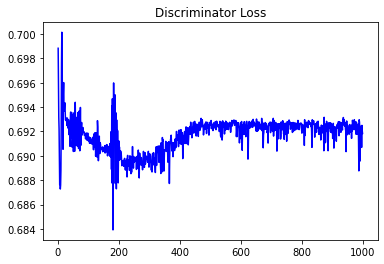

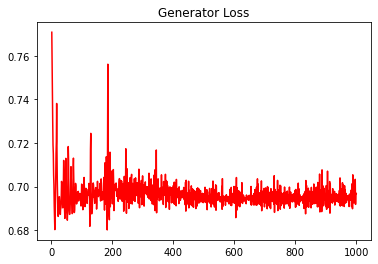

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.32253100593046086


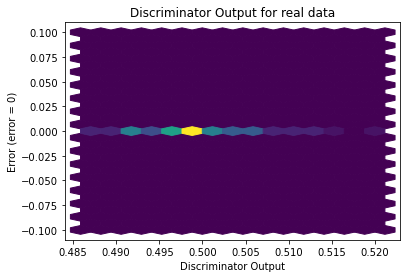

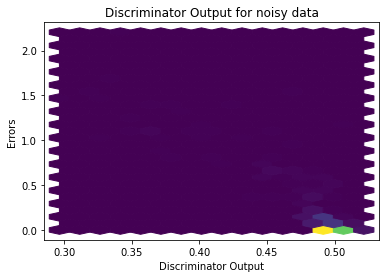

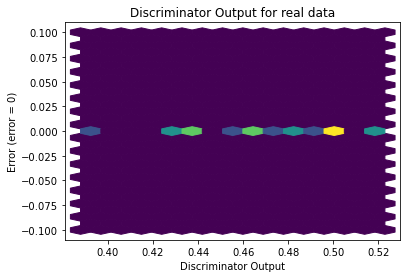

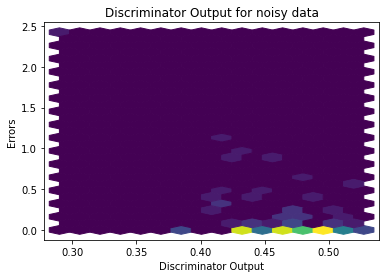

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


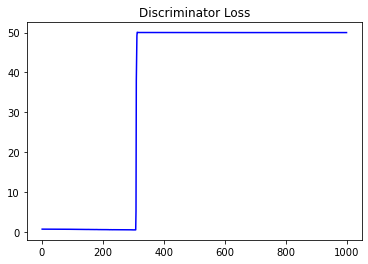

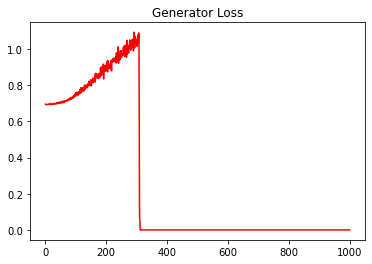

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1231.5414895554604


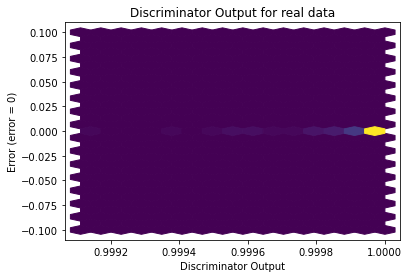

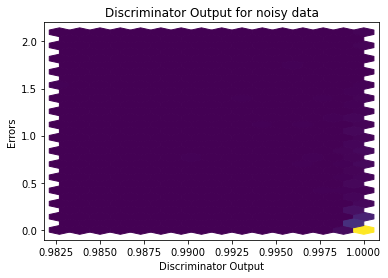

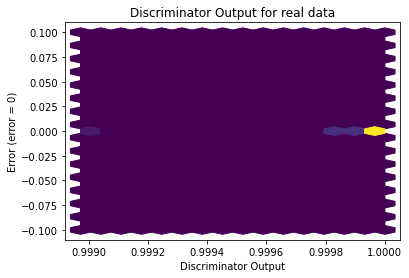

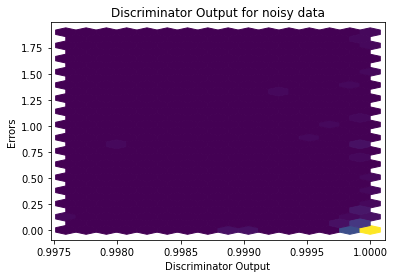

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0742]], requires_grad=True)
